<a href="https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220534805843&proxyReferer=https%3A%2F%2Fwww.google.com%2F">[HIERACHCY]

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread('../data/BnW.png', 0)

* 컨투어란 동일한 색 또는 동일한 픽셀값(강도,intensity)을 가지고 있는 영역의 경계선을 연결한 선을 말한다 ,윤곽선, 계층 구조를 반환한다.
* cv2.findContours(이진화 이미지, 컨투어를 찾는 방법, 컨투어를 표현하는 방법)

In [16]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

* cv2.drawContours()을 이용하여 검출된 윤곽선을 그린다. cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)을 의의미한다.

In [31]:
hierarchy

array([[[ 1, -1, -1, -1],
        [-1,  0,  2, -1],
        [ 3, -1, -1,  1],
        [ 4,  2, -1,  1],
        [-1,  3, -1,  1]]], dtype=int32)

In [45]:
hierarchy[0][4][3]

1

In [20]:
# 외부 윤곽선 마스크
image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: # 이부분은 뭐지?
        cv2.drawContours(image_external, contours, i, 255, -1)

In [21]:
# 내부 윤곽선 마스크
image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)

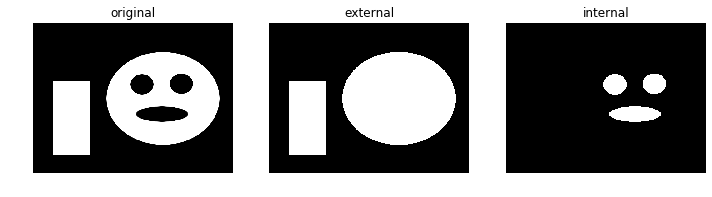

In [23]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')
plt.tight_layout()
plt.show()

<img src="contour.png">